In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
#url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
#response = requests.get(url)
#print(response.status_code)  # Should print 200 if the request was successful
#with open(r'C:\Users\Abdullahi Mujaheed\Desktop\mlzoom\car_data.csv', 'wb') as file:
   # file.write(response.content)'''

In [3]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
    return df

In [4]:
data = load_data(r'C:\Users\Abdullahi Mujaheed\Desktop\mlzoom\car_data.csv')
data.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

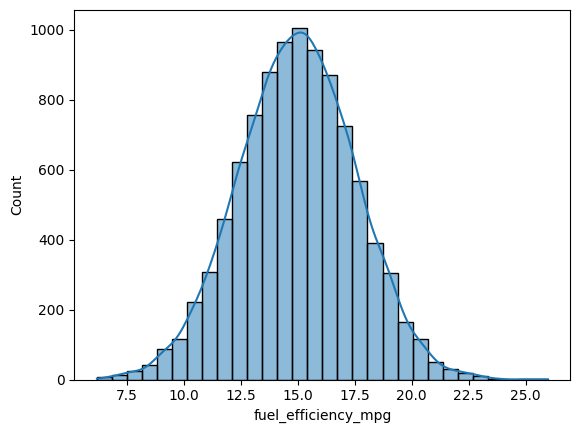

In [5]:
sns.histplot(data['fuel_efficiency_mpg'], bins= 30, kde = True)

In [7]:
data['fuel_efficiency_mpg'] = np.log1p(data['fuel_efficiency_mpg'])

In [ ]:
sns.histplot(data['fuel_efficiency_mpg'], bins= 30, kde = True)

the fuel efficiency column is uniformly distributed

In [ ]:
data.isna().sum()

In [ ]:
print(data['horsepower'].median())

In [ ]:
shuffled_data = data.sample(frac = 1, random_state = 42, ignore_index = True)
shuffled_data

In [ ]:
train, val, test = np.split(shuffled_data, [int(0.6*len(shuffled_data)), int(.8*len(shuffled_data))])

In [ ]:
test

In [ ]:
def fillna_with_mean(df, column):
    df[column] = df[column].fillna(df[column].mean())
    return df

In [ ]:
def fillna_with_0(df, column):
    df[column] = df[column].fillna(0)
    return df

In [ ]:
train_0 = fillna_with_0(train, 'horsepower')
train_0

In [ ]:
train_mean = fillna_with_mean(train, 'horsepower')
train_mean

In [ ]:
y_train = train['fuel_efficiency_mpg'].values
y_val = val['fuel_efficiency_mpg'].values
y_test = test['fuel_efficiency_mpg'].values

In [ ]:
#del train_0['fuel_efficiency_mpg']
#del train_mean['fuel_efficiency_mpg']
del val['fuel_efficiency_mpg']
del test['fuel_efficiency_mpg']

In [ ]:
train_0

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
params0_train = train_linear_regression(train_0.values, y_train)

In [ ]:
params_mean_train = train_linear_regression(train_mean.values, y_train)

In [ ]:
# Unpack weights
intercept_0, weights_0 = params0_train
intercept_mean, weights_mean = params_mean_train
print(intercept_0, weights_0)

print(intercept_mean, weights_mean)

In [ ]:
val_0 = fillna_with_0(val, 'horsepower')
val_mean = fillna_with_mean(val, 'horsepower')
print(val_0.shape,'\n',val_mean.shape)

In [ ]:
# Compute predictions
val_pred_0 = intercept_0 + val_0.dot(weights_0)
val_pred_mean = intercept_mean + val_mean.values.dot(weights_mean)
print(val_pred_0.shape, '\n', val_pred_mean.shape)
print(y_val.shape)

In [ ]:
# Compute RMSE
rmse_val_0 = np.sqrt(np.mean((val_pred_0 - y_val) ** 2))
rmse_val_mean = np.sqrt(np.mean((val_pred_mean - y_val) ** 2))

print(f'the rmse of validation_0: {rmse_val_0}, \nthe rmse of validation_mean: {rmse_val_mean}')

regularization

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
reg_rmse_val = []
r = [0, 0.01, 0.1, 1, 5, 10, 100]
for i in r:
    w0, w_ = train_linear_regression_reg(train_0.values, y_train, i)
    reg_val_pred_0 = (w0 + val_0.values.dot(w_))
    reg_rmse_val_0 = np.sqrt(np.mean((reg_val_pred_0 - y_val)**2))
    reg_rmse_val.append(reg_rmse_val_0)
    

In [ ]:
reg_rmse_val

In [ ]:
data['horsepower'] = data['horsepower'].fillna(0)
data.isna().sum()

In [ ]:
n_rmse = []
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for sd in seed:
    shuffled_data = data.sample(frac = 1, random_state = sd, ignore_index = True)
    n_train, n_val, n_test = np.split(shuffled_data, [int(0.6*len(shuffled_data)), int(.8*len(shuffled_data))])
    n_y_train = n_train['fuel_efficiency_mpg'].values
    n_y_val = n_val['fuel_efficiency_mpg'].values
    n_y_test = n_test['fuel_efficiency_mpg'].values
    del n_train['fuel_efficiency_mpg']
    del n_val['fuel_efficiency_mpg']
    del n_test['fuel_efficiency_mpg']
    bias, weight = train_linear_regression(n_train.values, n_y_train)
    n_val_pred = bias + n_val.values.dot(weight)
    n_val_rmse = np.sqrt(((n_val_pred - n_y_val)**2).mean())
    n_rmse.append(n_val_rmse)

std_rmse = round(np.std(n_rmse), 3)

In [ ]:
std_rmse

In [8]:
data['horsepower'] = data['horsepower'].fillna(0)
data.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [9]:
data = data.sample(frac=1, random_state= 9, ignore_index= True)
f_train_val, f_test = np.split(data, [int(.8*len(data))])

c:\Users\Abdullahi Mujaheed\Desktop\elevvo\elevvo-bootcamp\elevvo-venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,240,136.0,4050.512290,2006,1.231165
1,190,141.0,3195.866942,2017,1.300935
2,200,184.0,3006.164370,2017,1.346609
3,200,0.0,2947.143980,2022,1.335031
4,250,132.0,3114.371978,2001,1.318830
...,...,...,...,...,...
9699,130,190.0,2929.265698,2018,1.349885
9700,270,127.0,3489.985764,2017,1.281741
9701,240,177.0,3348.840052,2010,1.296493
9702,250,150.0,2985.704630,2022,1.331298


In [13]:
y_train_val = f_train_val['fuel_efficiency_mpg'].values
f_test = f_test['fuel_efficiency_mpg'].values
f_train_val.drop(['fuel_efficiency_mpg'])
f_test.drop(['fuel_efficiency_mpg'])

KeyError: 'fuel_efficiency_mpg'